In [2]:
import pickle

In [43]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/table_dict.pkl', 'rb') as f:
    td = pickle.load(f)

In [45]:
for k in td.keys():
    if (td[k].shape[0] == 0) or (td[k].shape[1] == 0):
        print('problems')

In [7]:
nans = 0
nan_tables = []
for k in td.keys():
    if td[k] == None:
        nans += 1
        nan_tables.append(k)

In [8]:
nans

286327

In [10]:
import pandas as pd

In [9]:
nan_tables[0:5]

['471.142163.csv',
 '349.18982.csv',
 '155.107247.csv',
 '219.46729.csv',
 '629.8417.csv']

In [13]:
type(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/csv_tables/train/471.142163.csv'))

pandas.core.frame.DataFrame

In [16]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/csv_tables/train/349.18982.csv', header=None)

,0,1,2,3,4,5,6,7
0,Paolo Persoglia,Boys' -66 kg,{{flagIOCathlete| Ghazaryan|ARM|2010 Summer Yo...,Repechage\n{{flagIOCathlete|[[Farshid Ghasemi ...,Did not advance,Did not advance,Did not advance,17


In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train.csv')

In [5]:
df.head()

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,155.39558,437.71460,34,0.400000,0.000015,0.608696,0.000006,0.625000,0.001394
1,323.80474,53.41837,6,0.583333,0.000014,0.736842,0.000006,0.363636,0.000401
2,331.55837,497.29414,50,0.592593,0.000015,0.761905,0.000007,0.277778,0.870237
3,124.96752,230.72970,40,0.516667,0.000007,0.794872,0.000003,0.187500,3.025835
4,237.29154,603.25921,15,1.000000,0.000002,1.000000,0.000001,1.000000,0.000336


In [32]:
list(td.keys())[0:5]

['330.92197.csv',
 '419.54000.csv',
 '188.52114.csv',
 '208.413.csv',
 '486.86352.csv']

In [33]:
td['208.413.csv']

In [6]:
list(td.keys())[0:10]

['330.92197.csv',
 '419.54000.csv',
 '188.52114.csv',
 '208.413.csv',
 '486.86352.csv',
 '487.18323.csv',
 '590.30067.csv',
 '578.90909.csv',
 '497.14774.csv',
 '434.126782.csv']

In [50]:
from tqdm import tqdm
def rename_labels(df: pd.DataFrame, names_set: set):
    r_ids = []
    s_ids = []
    for r in tqdm(range(df.shape[0])):
        r_id = str(df.iloc[r]['r_id'])
        while r_id+'.csv' not in names_set:
            r_id+='0'
        r_ids.append(r_id + '.csv')

        s_id = str(df.iloc[r]['s_id'])
        while s_id+'.csv' not in names_set:
            s_id+='0'
        s_ids.append(s_id + '.csv')
    df['r_id'] = r_ids
    df['s_id'] = s_ids
    return df

In [52]:
train = rename_labels(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train_test_valid_wrong_names/train.csv'), set(td.keys()))

100%|██████████| 500000/500000 [00:36<00:00, 13555.60it/s]


In [53]:
test = rename_labels(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train_test_valid_wrong_names/test.csv'), set(td.keys()))

100%|██████████| 60000/60000 [00:04<00:00, 13679.46it/s]


In [54]:
valid = rename_labels(pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train_test_valid_wrong_names/valid.csv'), set(td.keys()))

100%|██████████| 60000/60000 [00:04<00:00, 13591.40it/s]


In [62]:
train.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train.csv', index=False)

In [63]:
test.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/test.csv', index=False)

In [64]:
valid.to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/valid.csv', index=False)

In [21]:
train

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,155.39558.csv,437.7146.csv,34,0.400000,0.000015,0.608696,5.722046e-06,0.625000,0.001394
1,323.80474.csv,53.41837.csv,6,0.583333,0.000014,0.736842,6.198883e-06,0.363636,0.000401
2,331.55837.csv,497.29414.csv,50,0.592593,0.000015,0.761905,6.675720e-06,0.277778,0.870237
3,124.96752.csv,230.7297.csv,40,0.516667,0.000007,0.794872,2.861023e-06,0.187500,3.025835
4,237.29154.csv,603.25921.csv,15,1.000000,0.000002,1.000000,1.192093e-06,1.000000,0.000336
...,...,...,...,...,...,...,...,...,...
499995,425.77964.csv,426.139959.csv,13,1.000000,0.000003,1.000000,9.536743e-07,1.000000,0.000534
499996,142.36784.csv,426.63559.csv,4,0.333333,0.000003,0.727273,7.152557e-07,0.400000,0.000235
499997,474.8903.csv,485.23755.csv,25,0.920000,0.000005,0.958333,2.145767e-06,0.909091,0.000570
499998,384.32709.csv,501.26246.csv,11,0.846154,0.000003,1.000000,9.536743e-07,1.000000,0.000530


In [35]:
td['437.7146.csv']

In [22]:
train_old = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/train.csv')

In [23]:
train_old

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,155.39558,437.714600,34,0.400000,0.000015,0.608696,5.722046e-06,0.625000,0.001394
1,323.80474,53.418370,6,0.583333,0.000014,0.736842,6.198883e-06,0.363636,0.000401
2,331.55837,497.294140,50,0.592593,0.000015,0.761905,6.675720e-06,0.277778,0.870237
3,124.96752,230.729700,40,0.516667,0.000007,0.794872,2.861023e-06,0.187500,3.025835
4,237.29154,603.259210,15,1.000000,0.000002,1.000000,1.192093e-06,1.000000,0.000336
...,...,...,...,...,...,...,...,...,...
499995,425.77964,426.139959,13,1.000000,0.000003,1.000000,9.536743e-07,1.000000,0.000534
499996,142.36784,426.635590,4,0.333333,0.000003,0.727273,7.152557e-07,0.400000,0.000235
499997,474.89030,485.237550,25,0.920000,0.000005,0.958333,2.145767e-06,0.909091,0.000570
499998,384.32709,501.262460,11,0.846154,0.000003,1.000000,9.536743e-07,1.000000,0.000530


In [72]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/graph_dict.pkl', 'rb') as f:
    gd = pickle.load(f)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fbca72d1650>>
Traceback (most recent call last):
  File "/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [67]:
train = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/valid.csv')
for r in tqdm(range(train.shape[0])):
    try:
        td[train.iloc[r]['r_id']]
        td[train.iloc[r]['s_id']]
    except:
        print(f'problems in row {r}')
        break
    

100%|██████████| 60000/60000 [00:04<00:00, 14502.15it/s]


In [68]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/valid.csv')

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,369.25277.csv,386.124131.csv,11,0.647059,0.000004,0.846154,1.430511e-06,0.846154,0.000648
1,101.33062.csv,366.28041.csv,10,0.538462,0.000005,0.700000,2.145767e-06,0.500000,0.000441
2,480.45556.csv,485.67349.csv,8,0.693431,0.000018,0.950000,6.675720e-06,0.871795,0.000860
3,416.21973.csv,476.36749.csv,36,0.600000,0.000002,0.750000,9.536743e-07,0.666667,0.000318
4,150.21534.csv,192.45177.csv,6,0.727273,0.000005,0.842105,1.907349e-06,0.484848,0.000339
...,...,...,...,...,...,...,...,...,...
59995,422.159895.csv,426.123759.csv,11,0.846154,0.000002,1.000000,9.536743e-07,1.000000,0.000457
59996,429.136565.csv,429.145896.csv,3,0.769231,0.000003,0.909091,2.145767e-06,0.666667,0.000240
59997,497.106001.csv,498.68459.csv,32,1.000000,0.000008,1.000000,2.861023e-06,0.476190,0.001431
59998,489.16571.csv,492.131694.csv,23,0.975000,0.000006,1.000000,2.384186e-06,0.380952,0.001912


In [2]:
import pandas as pd
d = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/test.csv')

In [3]:
d

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327
...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246


In [13]:
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/train.csv')

In [14]:
dd

,r_id,s_id,a%
0,half_life_csv_licensed.zip_2019-GOAT-HiConsump...,id_csv_licensed.zip_1629725_3.csv,0.160000
1,half_life_csv_licensed.zip_13-14_244.csv,running_time_csv_licensed.zip_13-14_429.csv,0.818182
2,in_time_csv_licensed.zip_0225_174842_Initializ...,real_time_csv_licensed.zip_0203_201327_Initial...,0.500000
3,id_csv_licensed.zip_28920.csv,id_csv_licensed.zip_31701.csv,0.724490
4,id_csv_licensed.zip_fm_policytc_8.csv,id_csv_licensed.zip_testDataApplicantList.csv,0.457143
...,...,...,...
499995,show_time_csv_licensed.zip_1987-02-28_5.csv,real_time_csv_licensed.zip_Inception-v2_203.csv,0.000000
499996,lead_time_csv_licensed.zip_2017恋练有词考研词组背多分.csv,object_csv_licensed.zip_TotalResultsofRhino.v1...,0.000000
499997,object_csv_licensed.zip_funcs_by_name_161.csv,then_csv_licensed.zip_17-18_431.csv,0.000000
499998,speed_of_light_csv_licensed.zip_funcs_by_addre...,inflation_rate_csv_licensed.zip_011-DA_User_ba...,0.000000


In [18]:
d[['r_id','s_id','a%']]

,r_id,s_id,a%
0,198.7650.csv,198.97756.csv,0.215385
1,309.87528.csv,309.87529.csv,0.250000
2,124.35588.csv,574.6628.csv,0.105769
3,225.64426.csv,401.116864.csv,0.800000
4,441.155903.csv,618.72349.csv,0.281250
...,...,...,...
59995,245.13162.csv,377.69517.csv,0.058065
59996,392.26789.csv,447.114168.csv,0.200000
59997,382.160.csv,440.84900.csv,0.333333
59998,322.68550.csv,488.146192.csv,0.400000


In [16]:
type(dd.iloc[0]['a%'])

numpy.float64

In [17]:
type(d.iloc[0]['seeds'])

numpy.int64

In [37]:
train.iloc[3]

r_id          124.96752.csv
s_id           230.7297.csv
seeds                    40
jsim               0.516667
jsim_time          0.000007
josie              0.794872
josie_time         0.000003
a%                   0.1875
total_time         3.025835
Name: 3, dtype: object

In [48]:
td['230.72970.csv']

In [44]:
230.72970

230.7297

In [71]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/train.csv')

,r_id,s_id,a%
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868
...,...,...,...
99995,id_csv_licensed.zip_10.1038_ncomms8482.csv,parent_csv_licensed.zip_2017-12-12_2.csv,0.000000
99996,rate_of_return_csv_licensed.zip_messages_pt_25...,object_csv_licensed.zip_31f.0.testMap.csv,0.000000
99997,id_csv_licensed.zip_es-MX_13.csv,safe_period_csv_licensed.zip_funcs_by_name_97.csv,0.000000
99998,whole_csv_licensed.zip_01-02_274.csv,in_time_csv_licensed.zip_0203_110150_Initializ...,0.000000


In [17]:
git = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/evaluation_test_last_with_sloth_times_embeddings_retested.csv')

In [18]:
git.head()

,r_id,s_id,a%,sloth_time,jsim,jsim_time,os_sim,os_sim_time,AE_jsim,AE_os_sim,graphs_generation_time,embeddings_generation_time,cos_sim_time_armadillo,armadillo_total_time,armadillo,AE_armadillo,overlap_computations_repeated_armadillo,overlap_computations_no_read_armadillo
0,seek_time_csv_licensed.zip_PL1331LAGS2BRH.csv,seek_time_csv_licensed.zip_PL1331LAGTN98H.csv,0.473684,0.030304,0.238009,0.000201,0.462185,0.000061,0.235675,0.011499,0.777510,0.165847,0.051219,0.994586,0.706485,0.232801,0.019754,0.018656
1,in_time_csv_licensed.zip_0203_002257_Initializ...,in_time_csv_licensed.zip_0212_004622_Initializ...,0.500000,0.000382,0.502674,0.000017,0.671429,0.000007,0.002674,0.171429,0.020989,0.003316,0.000179,0.024487,0.565258,0.065258,0.001265,0.001041
2,id_csv_licensed.zip_01_language_5.csv,id_csv_licensed.zip_Hospitalization22MR_BA_gri...,0.314103,0.000845,0.175627,0.000015,0.466667,0.000004,0.138475,0.152564,0.028612,0.002071,0.000159,0.030846,0.390899,0.076797,0.001065,0.000969
3,in_time_csv_licensed.zip_0224_015304_Initializ...,real_time_csv_licensed.zip_0210_194429_Initial...,0.500000,0.000364,0.469388,0.000016,0.647887,0.000006,0.030612,0.147887,0.020275,0.001904,0.000149,0.022332,0.578556,0.078556,0.001097,0.001001
4,object_csv_licensed.zip_Configuration3_window2...,object_csv_licensed.zip_Configuration3_window8...,0.367868,19.989065,0.477702,0.000113,0.699749,0.000044,0.109834,0.331881,0.311355,0.003020,0.000183,0.314563,0.267510,0.100357,0.001072,0.000974


In [25]:
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_dict_796970_good.pkl', 'rb') as f:
    td_git = pickle.load(f)

In [31]:
git = git[git['jsim']>=0.6]

In [32]:
git.shape

(1484, 18)

In [33]:
git = git[git['os_sim']>=0.6]

In [34]:
git = git[git['a%']<=0.4]

In [40]:
good = []
for r in range(git.shape[0]):
    t1 = td_git[git.iloc[r]['r_id']]
    t2 = td_git[git.iloc[r]['s_id']]
    if ((t1.shape[0]*t1.shape[0]) + (t2.shape[0]*t2.shape[1])) < 100:
        good.append(r)
    print((t1.shape[0]*t1.shape[0]) + (t2.shape[0]*t2.shape[1]))

40800
3900
45221
51425
40800
3629
10600
10600
51525
1003000
10600
51525
6000
40900
117640
16819
101714
1003000
9536
10600
114729
106771
67154
6000
1003000
6192
104566
40800
3900
6066
51425
1003000
3900
9536
67027
3900
84805
40800
159009
1017277
884
268
9536
10876
464269
51425
40900
3900
40900
4245
3900
10600
10600
3975
116656
51525
51525
10600
84800
1101
4909
51425
72783
158617
40900
10600
1003000
10876
3900
1164
51425
40900
5889
40800
9536
5884
68158
10600
41400
1003000
16328
51425
9536
12911
4964
40800
4964
10600
3975
51425
40900
3975
9536
4490
4964
10600
9536
10600
40900
3900
51425
51525
8276
10600
114729
34189
10600
3900
51425
51525
121284
51425
1003000
62601
1031
41400
104824
625
12690
114729
41400
40900
4439
5047
40900
3900
40800
3900
3486
40900
41400
22968
5889
84800
1438
3975
51425
51425
51425
9536
10600
1081
3900
3900
100941
10600
40800
6557
40900
10600
1003000
11869
4145
9536
105084
37108
1075
3900
10600
10874
4432
10600
5180
27159
51425
3900
463100
10600
3900
41400
51525
116

In [41]:
good

[]

In [2]:
import pickle
with open('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/graph_dict.pkl', 'rb') as f:
    gd = pickle.load(f)

/home/francesco.pugnaloni/miniconda3/envs/GNNTE/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
for k in gd.keys():
    if gd[k] == None:
        print('arg')

In [3]:
l = list(gd.keys())

In [4]:
l[0]

'330.92197.csv'

In [7]:
gd['330.92197.csv'].edges

tensor([[10,  4, 10,  0, 11,  4, 11,  1, 12,  4, 12,  2, 13,  4, 13,  3, 14,  5,
         14,  0, 15,  5, 15,  1, 16,  5, 16,  2, 17,  5, 17,  3, 18,  6, 18,  0,
         19,  6, 19,  1, 20,  6, 20,  2, 21,  6, 21,  3, 22,  7, 22,  0, 23,  7,
         23,  1, 24,  7, 24,  2, 25,  7, 25,  3, 26,  8, 26,  0, 27,  8, 27,  1,
         28,  8, 28,  2, 29,  8, 29,  3, 30,  9, 30,  0, 31,  9, 31,  1, 32,  9,
         32,  2, 33,  9, 33,  3],
        [ 4, 10,  0, 10,  4, 11,  1, 11,  4, 12,  2, 12,  4, 13,  3, 13,  5, 14,
          0, 14,  5, 15,  1, 15,  5, 16,  2, 16,  5, 17,  3, 17,  6, 18,  0, 18,
          6, 19,  1, 19,  6, 20,  2, 20,  6, 21,  3, 21,  7, 22,  0, 22,  7, 23,
          1, 23,  7, 24,  2, 24,  7, 25,  3, 25,  8, 26,  0, 26,  8, 27,  1, 27,
          8, 28,  2, 28,  8, 29,  3, 29,  9, 30,  0, 30,  9, 31,  1, 31,  9, 32,
          2, 32,  9, 33,  3, 33]])

In [1]:
import pandas as pd

In [17]:
df = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/effectiveness/effectiveness.csv')
df['AE_jsim'] = abs(df['jsim'] - df['a%'])
df['AE_oset_sim'] = abs(df['josie'] - df['a%'])
df.describe()

,seeds,jsim,jsim_time,josie,josie_time,a%,total_time,overlap_armadillo,AE_armadillo,AE_jsim,AE_oset_sim
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.503128,0.070008,0.219903,0.325091
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.299269,0.091184,0.192537,0.252332
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.251781,0.000718,0.083333,0.100000
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.487401,0.040061,0.169312,0.333333
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.769231,0.102252,0.300000,0.500000
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,1.000000,1.000000,0.984375,0.984375


In [6]:
df['AE_jsim'] = abs(df['jsim'] - df['a%'])
df['AE_oset_sim'] = abs(df['josie'] - df['a%'])

In [7]:
df.describe()

,seeds,jsim,jsim_time,josie,josie_time,a%,total_time,graphs_generation_time,embeddings_generation_time,cos_sim_time_armadillo,armadillo_total_time,armadillo,AE_armadillo,overlap_computations_repeated_armadillo,overlap_computations_no_read_armadillo,AE_jsim,AE_oset_sim
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.006343,0.001689,0.000146,0.008180,0.562836,0.119146,0.000227,0.000135,0.219903,0.325091
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.008727,0.000295,0.000021,0.008813,0.266788,0.142798,0.000181,0.000179,0.192537,0.252332
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.001019,0.001604,0.000141,0.002794,0.000000,0.000000,0.000215,0.000126,0.000000,0.000000
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.002236,0.001637,0.000144,0.004048,0.369021,0.019978,0.000219,0.000128,0.083333,0.100000
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.003515,0.001658,0.000145,0.005319,0.563093,0.075787,0.000220,0.000129,0.169312,0.333333
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.005172,0.001691,0.000147,0.007007,0.769231,0.163311,0.000221,0.000129,0.300000,0.500000
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,0.092574,0.012824,0.004153,0.095008,1.000000,1.000000,0.020289,0.019195,0.984375,0.984375


In [22]:
ff = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/efficiency/efficiency.csv')

In [19]:
ff

NameError: name 'ff' is not defined

In [4]:
import pandas as pd
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/table_querying_tmp_data/sloth_predictions.csv')

In [20]:
dd

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time
0,8000000,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000,0.000055,0.000000,0.000004,0.000000,0.012150
1,8000001,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.064431,0.000051,0.529730,0.000005,0.475248,0.008166
2,8000002,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,id_csv_licensed.zip_0021700946_4.csv,0.015710,0.000065,0.105263,0.000006,0.078125,14.486244
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545
4,8000004,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.056291,0.000096,0.148936,0.000023,0.091424,0.091802
...,...,...,...,...,...,...,...,...,...
9999995,6999995,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.072464,0.000006,0.196078,0.000002,0.052632,0.001652
9999996,6999996,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_metadata-info_58.csv,0.000000,0.000010,0.000000,0.000003,0.000000,0.000860
9999997,6999997,id_csv_licensed.zip_dtb_delivery_fee_105.csv,speed_of_light_csv_licensed.zip_weather-2015-0...,0.103306,0.000024,0.257732,0.000006,0.035714,0.002311
9999998,6999998,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_alg.exe.csv__417245484...,0.004184,0.000010,0.010309,0.000003,0.100000,0.001717


In [5]:
from sklearn.metrics import ndcg_score

In [18]:
dd.dropna(inplace=True)

In [21]:
tmp = dd[dd['r_id'] == 'seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv']

In [28]:
import numpy as np
np.array(tmp[['a%']])

array([[0.        ],
       [0.47524752],
       [0.078125  ],
       ...,
       [0.03571429],
       [0.        ],
       [0.16198347]])

In [51]:
ndcg_score(y_true=np.array(tmp[['a%']]).reshape(1,-1)*10, y_score=np.array(tmp[['jsim']]).reshape(1,-1)*10,k=10)

0.8587242218520094

In [52]:
ndcg_score(y_true=np.array(tmp[['a%']]).reshape(1,-1)*10, y_score=np.array(tmp[['josie']]).reshape(1,-1)*10, k=10)

0.46586474446268206

In [9]:
.1

0.1

In [33]:
ndcg_score(np.array([[0.9**(1/2),0.4**(1/2),0.6**(1/2), 0.2**(1/2)]]),np.array([[0.1,0.4,0.3,0.2]]))

0.9008969474123476

In [38]:
type(np.array([[0.9**(1/2),0.4**(1/2),0.6**(1/2), 0.2**(1/2)]])[0][0])

numpy.float64

In [46]:
np.array([[0.9**(1/2),0.4**(1/2),0.6**(1/2), 0.2**(1/2)]])*10

array([[9.48683298, 6.32455532, 7.74596669, 4.47213595]])

In [37]:
type(np.array(tmp[['a%']])[0][0])

numpy.float64

In [42]:
np.array(tmp['a%']).reshape(1,-1).shape

(1, 9975)

In [54]:
import pickle
with open('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/table_querying_tmp_data/table_querying_results_armadillo_no_csv.pkl', 'rb') as f:
    dda = pickle.load(f)

In [55]:
dda.keys()

dict_keys(['seek_time_csv_licensed.zip_PL1331LAGRZ6NH.csv', 'processing_time_csv_licensed.zip_J01-2004_721.csv', 'then_csv_licensed.zip_J01-2004_324.csv', 'seek_time_csv_licensed.zip_PL1331LAHDNTTH.csv', 'id_csv_licensed.zip_technician_shifts_480.csv', 'seek_time_csv_licensed.zip_PL2331LAGSURSJ.csv', 'id_csv_licensed.zip_requested_services_330.csv', 'parent_csv_licensed.zip_Configuration2_window7_split8_typetest_projectpoi1.5.csv', 'seek_time_csv_licensed.zip_PL2331LAGN44KJ.csv', 'id_csv_licensed.zip_0021900491_10.csv', 'thing_csv_licensed.zip_P05-1013_123.csv', 'show_time_csv_licensed.zip_messages_ru_73.csv', 'data_rate_csv_licensed.zip_A00-2018_akanksha_194.csv', 'escape_velocity_csv_licensed.zip_Configuration2_window15_split7_typetest_projectvelocity1.6.csv', 'seek_time_csv_licensed.zip_PL2331LAGPUYNJ.csv', 'id_csv_licensed.zip_boxscore_0021700338.csv', 'object_csv_licensed.zip_Configuration3_window1_split10_typetest_projectsynapse1.1.csv', 'seek_time_csv_licensed.zip_PL2331LAHDWZAJ

In [56]:
dda['seek_time_csv_licensed.zip_PL1331LAGRZ6NH.csv']

{'total_time': 0.6365511417388916,
 'overlap_computation_time': 0.5155830383300781,
 'overlaps': [('lead_time_csv_licensed.zip_VBG.csv', 0.6870644092559814),
  ('centripetal_acceleration_csv_licensed.zip_queries-edx.csv',
   0.6636601686477661),
  ('escape_velocity_csv_licensed.zip_queries-edx.csv', 0.6636601090431213),
  ('id_csv_licensed.zip_FACT_OICS_1.csv', 0.6538208723068237),
  ('id_csv_licensed.zip_jos_menu_27.csv', 0.6504244804382324),
  ('show_time_csv_licensed.zip_JJ.csv', 0.640790581703186),
  ('bits_per_second_csv_licensed.zip_13-14_79.csv', 0.6378457546234131),
  ('beats_per_minute_csv_licensed.zip_PMI_df.csv', 0.6314292550086975),
  ('quick_time_csv_licensed.zip_PMI_df.csv', 0.6314291954040527),
  ('parent_csv_licensed.zip_analytic_coverage_04_20_2021.csv',
   0.6190639138221741),
  ('real_time_csv_licensed.zip_07-08_1381.csv', 0.6113214492797852),
  ('thing_csv_licensed.zip_07-08_2039.csv', 0.6113214492797852),
  ('show_time_csv_licensed.zip_NN.csv', 0.6019054055213928),

In [58]:
armadillo_out = dda
arm_preds = {}
for k in armadillo_out.keys():
    arm_preds[k] = {}
    for t in armadillo_out[k]['overlaps']:
        arm_preds[k][t[0]] = t[1]

In [61]:
arm_preds['seek_time_csv_licensed.zip_PL1331LAGRZ6NH.csv']['lead_time_csv_licensed.zip_VBG.csv']

0.6870644092559814

In [60]:
arm_preds.keys()

dict_keys(['seek_time_csv_licensed.zip_PL1331LAGRZ6NH.csv', 'processing_time_csv_licensed.zip_J01-2004_721.csv', 'then_csv_licensed.zip_J01-2004_324.csv', 'seek_time_csv_licensed.zip_PL1331LAHDNTTH.csv', 'id_csv_licensed.zip_technician_shifts_480.csv', 'seek_time_csv_licensed.zip_PL2331LAGSURSJ.csv', 'id_csv_licensed.zip_requested_services_330.csv', 'parent_csv_licensed.zip_Configuration2_window7_split8_typetest_projectpoi1.5.csv', 'seek_time_csv_licensed.zip_PL2331LAGN44KJ.csv', 'id_csv_licensed.zip_0021900491_10.csv', 'thing_csv_licensed.zip_P05-1013_123.csv', 'show_time_csv_licensed.zip_messages_ru_73.csv', 'data_rate_csv_licensed.zip_A00-2018_akanksha_194.csv', 'escape_velocity_csv_licensed.zip_Configuration2_window15_split7_typetest_projectvelocity1.6.csv', 'seek_time_csv_licensed.zip_PL2331LAGPUYNJ.csv', 'id_csv_licensed.zip_boxscore_0021700338.csv', 'object_csv_licensed.zip_Configuration3_window1_split10_typetest_projectsynapse1.1.csv', 'seek_time_csv_licensed.zip_PL2331LAHDWZAJ

In [62]:
d = {'ff':[]}
for k in range(5):
    d['ff'].append(k)

In [64]:
k = pd.DataFrame(d)

In [65]:
k['luca'] = [1,2,3,4,5]

In [66]:
k

,ff,luca
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5


In [67]:
dak = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/wikitables_stats.csv')

In [68]:
dak.describe()

,n_cols,n_rows,area,n_distinct_values,n_numerical,n_textual,n_nans,n_bools
count,2.127551e+06,2.127551e+06,2.127551e+06,2.127551e+06,2.127551e+06,2.127551e+06,2.127551e+06,2.127551e+06
mean,5.226195e+00,1.147382e+01,6.471986e+01,4.234295e+01,5.819784e+00,5.369081e+01,5.209242e+00,2.914149e-05
std,4.063033e+00,2.732220e+01,1.826009e+02,9.867172e+01,3.800527e+01,1.535340e+02,3.797702e+01,3.716087e-02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+00,3.000000e+00,1.000000e+01,9.000000e+00,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,6.000000e+00,2.700000e+01,2.100000e+01,0.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00
75%,6.000000e+00,1.200000e+01,6.300000e+01,4.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,0.000000e+00
max,8.830000e+02,4.670000e+03,3.857000e+04,2.034700e+04,9.296000e+03,3.857000e+04,1.034600e+04,5.400000e+01


In [71]:
dak.drop(columns=['n_bools']).describe().to_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/wikitables_stats_desc.csv', index=False)

In [73]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/wikitables_stats.csv').shape

(2127551, 9)

In [ ]:
2127551

In [74]:
klkl = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/sloth_armadillo_predictions_table_querying.csv')

In [75]:
klkl

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo
0,8000000,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000,0.000055,0.000000,0.000004,0.000000,0.012150,0.272864
1,8000001,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.064431,0.000051,0.529730,0.000005,0.475248,0.008166,0.352441
2,8000002,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,id_csv_licensed.zip_0021700946_4.csv,0.015710,0.000065,0.105263,0.000006,0.078125,14.486244,0.411786
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545,0.337523
4,8000004,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.056291,0.000096,0.148936,0.000023,0.091424,0.091802,0.442848
...,...,...,...,...,...,...,...,...,...,...
9994371,6999995,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.072464,0.000006,0.196078,0.000002,0.052632,0.001652,0.101239
9994372,6999996,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_metadata-info_58.csv,0.000000,0.000010,0.000000,0.000003,0.000000,0.000860,-0.054163
9994373,6999997,id_csv_licensed.zip_dtb_delivery_fee_105.csv,speed_of_light_csv_licensed.zip_weather-2015-0...,0.103306,0.000024,0.257732,0.000006,0.035714,0.002311,-0.121819
9994374,6999998,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_alg.exe.csv__417245484...,0.004184,0.000010,0.010309,0.000003,0.100000,0.001717,0.264201


In [78]:
klkl[klkl['armadillo']<0] = 0

In [79]:
klkl[klkl['armadillo']<0]

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo


In [80]:
klkl

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo
0,8000000,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000,0.000055,0.000000,0.000004,0.000000,0.012150,0.272864
1,8000001,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.064431,0.000051,0.529730,0.000005,0.475248,0.008166,0.352441
2,8000002,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,id_csv_licensed.zip_0021700946_4.csv,0.015710,0.000065,0.105263,0.000006,0.078125,14.486244,0.411786
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545,0.337523
4,8000004,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.056291,0.000096,0.148936,0.000023,0.091424,0.091802,0.442848
...,...,...,...,...,...,...,...,...,...,...
9994371,6999995,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.072464,0.000006,0.196078,0.000002,0.052632,0.001652,0.101239
9994372,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994373,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994374,6999998,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_alg.exe.csv__417245484...,0.004184,0.000010,0.010309,0.000003,0.100000,0.001717,0.264201


In [82]:
klkl['armadillo_ae'] = abs(klkl['armadillo']-klkl['a%'])
klkl['josie_ae'] = abs(klkl['josie']-klkl['a%'])
klkl['jsim_ae'] = abs(klkl['jsim']-klkl['a%'])

In [83]:
klkl.describe()

,id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo,armadillo_ae,josie_ae,jsim_ae
count,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06,9.994376e+06
mean,3.820405e+06,2.621375e-02,4.497941e-04,1.030476e-01,2.543786e-05,8.583473e-02,8.991432e-01,1.305030e-01,9.080177e-02,6.218761e-02,6.318188e-02
std,3.288266e+06,6.326302e-02,6.111657e-03,1.593761e-01,8.262407e-04,1.195803e-01,3.340424e+00,1.255692e-01,9.960108e-02,1.062008e-01,9.326611e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.552068e+05,0.000000e+00,5.245209e-06,0.000000e+00,1.430511e-06,0.000000e+00,3.707409e-04,8.628992e-03,4.066784e-03,0.000000e+00,0.000000e+00
50%,3.433596e+06,5.319149e-03,2.264977e-05,2.564103e-02,3.337860e-06,4.545455e-02,1.680613e-03,1.066141e-01,6.202716e-02,1.964550e-02,1.896664e-02
75%,6.688219e+06,2.397260e-02,6.294250e-05,1.648000e-01,5.722046e-06,1.363636e-01,1.077628e-02,2.078944e-01,1.419920e-01,8.754209e-02,9.786325e-02
max,9.999999e+06,1.000000e+00,9.883988e-01,1.000000e+00,4.064767e-01,1.000000e+00,6.400581e+01,9.999973e-01,9.804897e-01,9.921916e-01,9.873863e-01


In [84]:
klkl

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo,armadillo_ae,josie_ae,jsim_ae
0,8000000,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000,0.000055,0.000000,0.000004,0.000000,0.012150,0.272864,0.272864,0.000000,0.000000
1,8000001,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.064431,0.000051,0.529730,0.000005,0.475248,0.008166,0.352441,0.122806,0.054482,0.410816
2,8000002,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,id_csv_licensed.zip_0021700946_4.csv,0.015710,0.000065,0.105263,0.000006,0.078125,14.486244,0.411786,0.333661,0.027138,0.062415
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545,0.337523,0.188793,0.085834,0.439961
4,8000004,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.056291,0.000096,0.148936,0.000023,0.091424,0.091802,0.442848,0.351424,0.057512,0.035133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994371,6999995,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.072464,0.000006,0.196078,0.000002,0.052632,0.001652,0.101239,0.048608,0.143447,0.019832
9994372,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994373,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994374,6999998,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_alg.exe.csv__417245484...,0.004184,0.000010,0.010309,0.000003,0.100000,0.001717,0.264201,0.164201,0.089691,0.095816


In [85]:
from sklearn.metrics import ndcg_score

In [91]:
ndcg_score(y_true=np.array(klkl[['a%']]).reshape(1,-1), y_score=np.array(klkl[['jsim']]).reshape(1,-1), k=10)

0.989780896240407

In [103]:
ndcg_score(y_true=np.array(klkl[['a%']]).reshape(1,-1), y_score=np.array(klkl[['josie']]).reshape(1,-1), k=10132123123123123123)

0.9655765627745595

In [93]:
ndcg_score(y_true=np.array(klkl[['a%']]).reshape(1,-1), y_score=np.array(klkl[['armadillo']]).reshape(1,-1), k=10)

1.0

In [98]:
klkl[klkl['a%']>=0.5]

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo,armadillo_ae,josie_ae,jsim_ae
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545,0.337523,0.188793,0.085834,0.439961
8,8000008,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL1331LAGSMPGH.csv,0.309126,0.000210,0.555091,0.000063,0.526316,0.029824,0.396680,0.129636,0.028775,0.217190
15,8000015,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL1331LAGTPW4H.csv,0.339286,0.000174,0.509887,0.000059,0.513765,12.692080,0.278364,0.235400,0.003878,0.174479
21,8000021,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL1331LAGTLYBH.csv,0.363636,0.000177,0.538354,0.000062,0.526316,0.028604,0.367011,0.159305,0.012038,0.162679
52,8000052,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH9KBHJ.csv,0.017277,0.000042,0.657895,0.000003,0.526316,9.478164,0.500360,0.025956,0.131579,0.509039
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991907,6997531,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_MSNBC.201702_1.csv,0.374194,0.000008,0.597938,0.000003,0.500000,0.000575,0.421563,0.078437,0.097938,0.125806
9992244,6997868,id_csv_licensed.zip_dtb_delivery_fee_105.csv,question_time_csv_licensed.zip_MSNBC.201204_2.csv,0.469945,0.000024,0.886598,0.000004,0.500000,0.000659,0.144873,0.355127,0.386598,0.030055
9993481,6999105,id_csv_licensed.zip_dtb_delivery_fee_105.csv,running_time_csv_licensed.zip_CNN.201111_1.csv,0.326389,0.000009,0.500000,0.000004,0.500000,0.000609,0.233304,0.266696,0.000000,0.173611
9993920,6999544,id_csv_licensed.zip_dtb_delivery_fee_105.csv,whole_csv_licensed.zip_52f.0.testMap_1.csv,0.432749,0.000011,0.762887,0.000003,0.500000,0.000652,0.336223,0.163777,0.262887,0.067251


In [102]:
klkl[klkl['armadillo']<0.5]

,id,r_id,s_id,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo,armadillo_ae,josie_ae,jsim_ae
0,8000000,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,object_csv_licensed.zip_appidsvc.dll.csv__3865...,0.000000,0.000055,0.000000,0.000004,0.000000,0.012150,0.272864,0.272864,0.000000,0.000000
1,8000001,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,then_csv_licensed.zip_FOXNEWS.201210.csv,0.064431,0.000051,0.529730,0.000005,0.475248,0.008166,0.352441,0.122806,0.054482,0.410816
2,8000002,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,id_csv_licensed.zip_0021700946_4.csv,0.015710,0.000065,0.105263,0.000006,0.078125,14.486244,0.411786,0.333661,0.027138,0.062415
3,8000003,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,seek_time_csv_licensed.zip_PL2331LAH2V01J.csv,0.086355,0.000067,0.612150,0.000010,0.526316,9.460545,0.337523,0.188793,0.085834,0.439961
4,8000004,seek_time_csv_licensed.zip_PL1331LAGT9BXH.csv,living_thing_csv_licensed.zip_mrswunschel.csv,0.056291,0.000096,0.148936,0.000023,0.091424,0.091802,0.442848,0.351424,0.057512,0.035133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994371,6999995,id_csv_licensed.zip_dtb_delivery_fee_105.csv,seek_time_csv_licensed.zip_PL1331LAHBZYEH.csv,0.072464,0.000006,0.196078,0.000002,0.052632,0.001652,0.101239,0.048608,0.143447,0.019832
9994372,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994373,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9994374,6999998,id_csv_licensed.zip_dtb_delivery_fee_105.csv,object_csv_licensed.zip_alg.exe.csv__417245484...,0.004184,0.000010,0.010309,0.000003,0.100000,0.001717,0.264201,0.164201,0.089691,0.095816


In [2]:
for k in range(0, 101, 10):
    if k == 0:
        k=1
    print(k)

1
10
20
30
40
50
60
70
80
90
100


In [6]:
import pandas as pd
klk = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/ndcg_data.csv')
klk

,k,query_table,armadillo,overlap_set_sim,jsim
0,1,id_csv_licensed.zip_4204.csv,0.000000,0.175088,0.500000
1,1,id_csv_licensed.zip_7546.csv,0.250000,0.135857,0.500000
2,1,then_csv_licensed.zip_A00-2018_sweta_119.csv,1.000000,1.000000,1.000000
3,1,processing_time_csv_licensed.zip_P05-1013.annv...,0.727273,0.380585,1.000000
4,1,object_csv_licensed.zip_actualtWalkTwo2020_12_...,0.062271,0.178842,0.385524
...,...,...,...,...,...
11995,10000,seek_time_csv_licensed.zip_WD-WX41D94RNF01.csv,0.916310,0.967505,0.960500
11996,10000,seek_time_csv_licensed.zip_PL1331LAGSMJAH.csv,0.920862,0.967649,0.956487
11997,10000,parent_csv_licensed.zip_Configuration1_window8...,0.863645,0.946851,0.916729
11998,10000,seek_time_csv_licensed.zip_PL2331LAHDEV7J.csv,0.949996,0.967608,0.948832


In [19]:
klk[klk['k']==10000].describe()

,k,armadillo,overlap_set_sim,jsim
count,1000.0,1000.000000,1000.000000,1000.000000
mean,10000.0,0.866460,0.938426,0.932232
std,0.0,0.080687,0.053472,0.066544
min,10000.0,0.000000,0.000000,0.000000
25%,10000.0,0.833468,0.925382,0.913890
50%,10000.0,0.889358,0.955955,0.953223
75%,10000.0,0.916705,0.965844,0.975378
max,10000.0,0.987765,0.999997,0.999895


In [2]:
import pandas as pd

In [3]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/test.csv')

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327
...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246


In [12]:
import pandas as pd
dd = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/effectiveness_evaluation.csv')
dd

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo_wikitables,armadillo_wikitables_AE,armadillo_gittables,armadillo_gittables_AE,o_set_sim_AE,jsim_AE
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166,0.162806,0.052578,0.175342,0.040043,0.521457,0.367949
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202,0.359683,0.109683,0.668466,0.418466,0.187500,0.030000
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128,0.357759,0.251990,0.128538,0.022769,0.533406,0.333947
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886,0.839514,0.039514,0.953886,0.153886,0.018182,0.107692
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327,0.191752,0.089498,0.333093,0.051843,0.510417,0.205929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310,0.695972,0.637908,0.964013,0.905948,0.875269,0.816935
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973,0.565953,0.365953,0.340119,0.140119,0.487500,0.291071
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358,0.502552,0.169219,0.671056,0.337723,0.166667,0.033333
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246,0.515062,0.115062,0.000000,0.400000,0.200000,0.028571


In [6]:
dd['o_set_sim_AE'] = abs(dd['josie']-dd['a%'])

In [8]:
dd['jsim_AE'] = abs(dd['jsim']-dd['a%'])

In [10]:
dd.describe()

,seeds,jsim,jsim_time,josie,josie_time,a%,total_time,armadillo_wikitables,armadillo_wikitables_AE,armadillo_gittables,armadillo_gittables_AE,o_set_sim_AE,jsim_AE
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.562836,0.119146,0.526013,0.223159,0.325091,0.219903
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.266788,0.142798,0.348036,0.191419,0.252332,0.192537
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.369021,0.019978,0.199018,0.060371,0.100000,0.083333
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.563093,0.075787,0.521265,0.178949,0.333333,0.169312
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.769231,0.163311,0.879076,0.340711,0.500000,0.300000
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,1.000000,1.000000,1.000000,1.000000,0.984375,0.984375


In [1]:
import pandas as  pd

In [4]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/efficiency/efficiency.csv').describe()

,seeds,jsim,jsim_time,josie,josie_time,a%,total_time,graphs_generation_time,embeddings_generation_time,cos_sim_time_armadillo,armadillo_total_time,armadillo,AE_armadillo,overlap_computations_repeated_armadillo,overlap_computations_no_read_armadillo
count,60000.000000,60000.000000,6.000000e+04,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,67.941967,0.647238,5.192626e-06,0.820302,1.992679e-06,0.496343,0.914817,0.006343,0.001689,0.000146,0.008180,0.562836,0.119146,0.000227,0.000135
std,160.590663,0.203651,3.881562e-06,0.143001,1.404466e-06,0.291760,2.065447,0.008727,0.000295,0.000021,0.008813,0.266788,0.142798,0.000181,0.000179
min,1.000000,0.068627,2.384186e-07,0.189655,4.768372e-07,0.011494,0.000091,0.001019,0.001604,0.000141,0.002794,0.000000,0.000000,0.000215,0.000126
25%,9.000000,0.488372,3.099442e-06,0.720000,1.192093e-06,0.250000,0.000334,0.002236,0.001637,0.000144,0.004048,0.369021,0.019978,0.000219,0.000128
50%,22.000000,0.634615,4.291534e-06,0.842105,1.668930e-06,0.498705,0.000616,0.003515,0.001658,0.000145,0.005319,0.563093,0.075787,0.000220,0.000129
75%,41.000000,0.794118,5.960464e-06,0.945205,2.384186e-06,0.750000,0.174530,0.005172,0.001691,0.000147,0.007007,0.769231,0.163311,0.000221,0.000129
max,1428.000000,1.000000,1.418591e-04,1.000000,4.029274e-05,1.000000,37.229370,0.092574,0.012824,0.004153,0.095008,1.000000,1.000000,0.020289,0.019195


In [5]:
pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/2_WikiTables/test.csv')

,r_id,s_id,seeds,jsim,jsim_time,josie,josie_time,a%,total_time
0,198.7650.csv,198.97756.csv,88,0.583333,0.000004,0.736842,0.000001,0.215385,3.205166
1,309.87528.csv,309.87529.csv,4,0.280000,0.000003,0.437500,0.000001,0.250000,0.000202
2,124.35588.csv,574.6628.csv,70,0.439716,0.000014,0.639175,0.000004,0.105769,3.087128
3,225.64426.csv,401.116864.csv,17,0.692308,0.000010,0.818182,0.000005,0.800000,0.000886
4,441.155903.csv,618.72349.csv,110,0.487179,0.000007,0.791667,0.000003,0.281250,3.848327
...,...,...,...,...,...,...,...,...,...
59995,245.13162.csv,377.69517.csv,842,0.875000,0.000009,0.933333,0.000003,0.058065,11.562310
59996,392.26789.csv,447.114168.csv,84,0.491071,0.000014,0.687500,0.000005,0.200000,3.126973
59997,382.160.csv,440.84900.csv,12,0.300000,0.000005,0.500000,0.000002,0.333333,0.000358
59998,322.68550.csv,488.146192.csv,4,0.428571,0.000003,0.600000,0.000002,0.400000,0.000246


In [11]:
import seaborn as sns
import numpy as np
import matplotlib as plt

def compare_models_ndcg(data: pd.DataFrame | str, bin_criterion: str='k', bins_name: str='Correct Label', out_pdf: str=None, font_scale: float=0.7) -> pd.DataFrame:
    """Function to plot an histogram to compare performances of different models depending on their range of error 

    Args:
        data (pd.DataFrame | str): data frame containing the results
        bin_criterion (str, optional): parameter to generate the 10 bins, must be with values in [0,1]. Defaults to 'a%'.
        bins_name (str, optional): name of the bins. Defaults to 'AE'.
    """
    if isinstance(data, str):
        data = pd.read_csv(data)
    new_data = {
        'k':[],
        'Approach':[],
        'NDCG_Score':[]
    }
    for k in [1, 10, 20, 30, 40, 50, 60, 70,80,90,100,10_000]:
        t = data[data[bin_criterion] == k]
        
        new_data['Approach'].append('Armadillo')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['armadillo']),2))

        new_data['Approach'].append('Overlap Set Similarity')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['overlap_set_sim']),2))
        
        new_data['Approach'].append('Jaccard Similarity')
        new_data['k'].append(k)
        new_data['NDCG_Score'].append(round(np.mean(t['jsim']),2))
        
    
    df = pd.DataFrame(new_data)
    sns.set_theme(font_scale=font_scale, style="whitegrid")
    sns.barplot(data=df, x='k', y='NDCG_Score', hue='Approach')

    if isinstance(out_pdf, str):
        plt.tight_layout()
        
        plt.savefig(out_pdf, format="pdf", bbox_inches="tight")
    return df


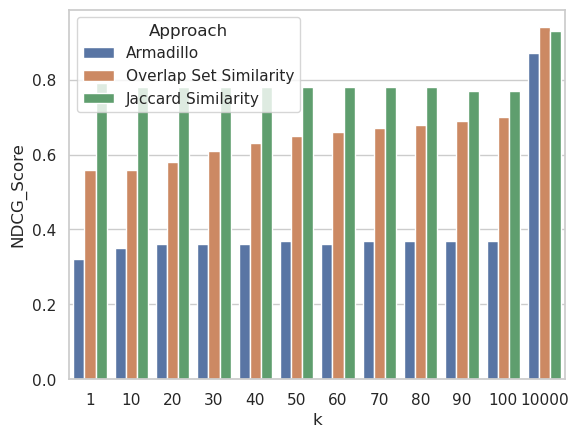

In [15]:
d = compare_models_ndcg('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/ndcg_data.csv', font_scale=1)

In [1]:
import pandas as pd

In [3]:
results = pd.read_csv('/home/francesco.pugnaloni/GNNTE/Datasets/1_Gittables/table_querying/ndcg_data.csv')

In [5]:
set(results['k'])

{1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 10000}

In [7]:
results[results['k']==1].describe()

,k,armadillo,overlap_set_sim,jsim
count,1000.0,1000.000000,1000.000000,1000.000000
mean,1.0,0.319812,0.555453,0.788573
std,0.0,0.345676,0.371927,0.300834
min,1.0,0.000000,0.000000,0.000000
25%,1.0,0.063916,0.166667,0.706767
50%,1.0,0.181818,0.557625,0.935673
75%,1.0,0.500000,0.966013,1.000000
max,1.0,1.000000,1.000000,1.000000
